#Camera Capturing Functions

In [19]:
import tensorflow.keras
import PIL 
from PIL import ImageOps
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [20]:
model = tensorflow.keras.models.load_model('/content/drive/My Drive/keras_model.h5')

In [21]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [22]:
def maskDetector(image): 

  size = (224, 224)

  image = PIL.ImageOps.fit(image, size, PIL.Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  data[0] = normalized_image_array

  prediction = model.predict(data)

  if prediction[0][0] > prediction[0][1] :
     maskStatus =  "The person in the image is wearing a mask" 
  else:
     maskStatus = "The person in the image is not wearing a mask"
  return maskStatus
  

In [23]:

from IPython.display import Image

def runThisFunction():

  try:
    filename = take_photo()
    image = PIL.Image.open(filename)
    status = maskDetector(image)
    print(status)
    #print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))

  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

# Camera Interface

<IPython.core.display.Javascript object>

The person in the image is wearing a mask


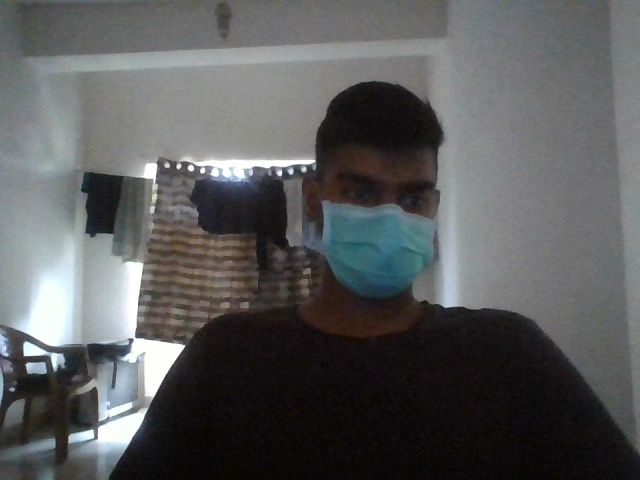

In [24]:
runThisFunction()
#press ctrl + shift + enter

<IPython.core.display.Javascript object>

The person in the image is not wearing a mask


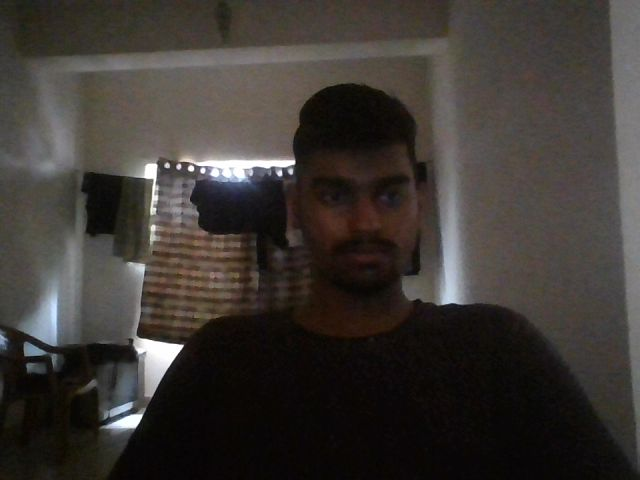

In [26]:
runThisFunction()